In [9]:
import kagglehub
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

file_path = "data/microdados_enem_2016_coma.csv"

cols = [
    "NU_INSCRICAO", "SG_UF_RESIDENCIA", "TP_ANO_CONCLUIU",
    "NU_IDADE", "TP_SEXO", "TP_COR_RACA",
    "TP_ESCOLA", "TP_DEPENDENCIA_ADM_ESC", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5",
    "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO",
    "Q001", "Q002", "Q005", "Q006"
]

chunks = []
chunksize = 100_000

for chunk in pd.read_csv(
    file_path,
    sep=",",
    encoding="latin1",
    on_bad_lines="skip",
    low_memory=False,
    chunksize=chunksize
):
    available_cols = [c for c in cols if c in chunk.columns]
    chunk = chunk[available_cols]
    chunks.append(chunk)
    print(f"Chunk lido: {len(chunk)} linhas")

df = pd.concat(chunks, ignore_index=True)

print("Dados carregados:", df.shape)
df = df.dropna(subset=["NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_CH"])
print("Shape pós-limpeza:", df.shape)

df.to_csv("data/enem2016_socioeconomico.csv", index=False, encoding="utf-8")

print("✅ Arquivo salvo: enem2016_socioeconomico.csv")


Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 100000 linhas
Chunk lido: 

In [10]:
df = pd.read_csv("data/enem2016_socioeconomico.csv")
print("Colunas disponíveis:", df.columns.tolist())


Colunas disponíveis: ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'TP_ANO_CONCLUIU', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006']


In [3]:
# --- transformar Q001, Q002, Q006 em numéricas (ordinais) ---
ord_cols = ["Q001", "Q002", "Q006"]
mappings = {}

for col in ord_cols:
    if col in df.columns:
        categorias = sorted(df[col].dropna().unique())
        mapping = {cat: i + 1 for i, cat in enumerate(categorias)}
        df[col + "_num"] = df[col].map(mapping)
        mappings[col] = mapping

# --- transformar TP_ESCOLA em numérica para fechar as 10 variáveis ---
if "TP_ESCOLA" in df.columns:
    df["TP_ESCOLA_num"] = df["TP_ESCOLA"].astype("category").cat.codes

mappings


{'Q001': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8},
 'Q002': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8},
 'Q006': {'A': 1,
  'B': 2,
  'C': 3,
  'D': 4,
  'E': 5,
  'F': 6,
  'G': 7,
  'H': 8,
  'I': 9,
  'J': 10,
  'K': 11,
  'L': 12,
  'M': 13,
  'N': 14,
  'O': 15,
  'P': 16,
  'Q': 17}}

In [11]:
# Dicionário de renomeação das colunas
rename_dict = {
    "NU_INSCRICAO": "inscricao",
    "SG_UF_RESIDENCIA": "uf_residencia",
    "TP_ANO_CONCLUIU": "ano_conclusao",
    "NU_IDADE": "idade",
    "TP_SEXO": "sexo",
    "TP_COR_RACA": "cor_raca",
    "TP_ESCOLA": "tipo_escola",
    "TP_DEPENDENCIA_ADM_ESC": "dependencia_escola",
    "NU_NOTA_COMP1": "nota_dominio_linguagem",
    "NU_NOTA_COMP2": "nota_compreensao_tema", 
    "NU_NOTA_COMP3": "nota_coesao_coerencia",    
    "NU_NOTA_COMP4": "nota_argumentacao",            
    "NU_NOTA_COMP5": "nota_proposta_intervencao",
    "NU_NOTA_CN": "nota_ciencias_natureza",
    "NU_NOTA_CH": "nota_ciencias_humanas",
    "NU_NOTA_LC": "nota_linguagens",
    "NU_NOTA_MT": "nota_matematica",
    "NU_NOTA_REDACAO": "nota_redacao",
    "Q001": "escolaridade_pai",
    "Q002": "escolaridade_mae",
    "Q005": "numero_moradores",
    "Q006": "renda_familiar"
}

# Aplicar renomeação
df.rename(columns=rename_dict, inplace=True)

print("Novos nomes de colunas:")
print(df.columns.tolist())

✅ Colunas renomeadas com sucesso!
Novos nomes de colunas:
['inscricao', 'uf_residencia', 'ano_conclusao', 'idade', 'sexo', 'cor_raca', 'tipo_escola', 'dependencia_escola', 'nota_dominio_linguagem', 'nota_compreensao_tema', 'nota_coesao_coerencia', 'nota_argumentacao', 'nota_proposta_intervencao', 'nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens', 'nota_matematica', 'nota_redacao', 'escolaridade_pai', 'escolaridade_mae', 'numero_moradores', 'renda_familiar']


In [14]:

# Cor ou raça
map_cor_raca = {
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena"
}

# Tipo de escola (em que o participante estudou)
map_tipo_escola = {
    1: "Não respondeu",
    2: "Pública",
    3: "Privada"
}

# Dependência administrativa da escola
map_dependencia_escola = {
    1: "Federal",
    2: "Estadual",
    3: "Municipal",
    4: "Privada"
}

# Escolaridade do pai (Q001)
map_escolaridade_pai = {
    "A": "Nunca estudou",
    "B": "Não completou o Ensino Fundamental",
    "C": "Completou o Ensino Fundamental",
    "D": "Completou o Ensino Médio",
    "E": "Completou o Ensino Superior",
    "F": "Pós-graduação",
    "G": "Não sei"
}

# Escolaridade da mãe (Q002)
map_escolaridade_mae = {
    "A": "Nunca estudou",
    "B": "Não completou o Ensino Fundamental",
    "C": "Completou o Ensino Fundamental",
    "D": "Completou o Ensino Médio",
    "E": "Completou o Ensino Superior",
    "F": "Pós-graduação",
    "G": "Não sei"
}

# Renda familiar (Q006)
map_renda_familiar = {
    "A": "Até R$ 980,00",
    "B": "De R$ 981 a R$ 1.470",
    "C": "De R$ 1.471 a R$ 1.960",
    "D": "De R$ 1.961 a R$ 2.940",
    "E": "De R$ 2.941 a R$ 3.920",
    "F": "De R$ 3.921 a R$ 4.900",
    "G": "De R$ 4.901 a R$ 5.880",
    "H": "De R$ 5.881 a R$ 6.860",
    "I": "De R$ 6.861 a R$ 7.840",
    "J": "De R$ 7.841 a R$ 8.820",
    "K": "De R$ 8.821 a R$ 9.800",
    "L": "De R$ 9.801 a R$ 11.760",
    "M": "De R$ 11.761 a R$ 14.700",
    "N": "De R$ 14.701 a R$ 19.600",
    "O": "De R$ 19.601 a R$ 24.500",
    "P": "Mais de R$ 24.501"
}

df["cor_raca"] = df["cor_raca"].map(map_cor_raca)
df["tipo_escola"] = df["tipo_escola"].map(map_tipo_escola)
df["dependencia_escola"] = df["dependencia_escola"].map(map_dependencia_escola)
df["escolaridade_pai"] = df["escolaridade_pai"].map(map_escolaridade_pai)
df["escolaridade_mae"] = df["escolaridade_mae"].map(map_escolaridade_mae)
df["renda_familiar"] = df["renda_familiar"].map(map_renda_familiar)

df[["sexo", "cor_raca", "tipo_escola", "dependencia_escola", 
    "escolaridade_pai", "escolaridade_mae", 
    "numero_moradores", "renda_familiar"]].head()


,sexo,cor_raca,tipo_escola,dependencia_escola,escolaridade_pai,escolaridade_mae,numero_moradores,renda_familiar
0,M,Parda,Não respondeu,NaN,Completou o Ensino Superior,Completou o Ensino Superior,2.0,De R$ 981 a R$ 1.470
1,M,Branca,Não respondeu,NaN,NaN,NaN,5.0,De R$ 1.961 a R$ 2.940
2,M,Parda,Não respondeu,NaN,Não completou o Ensino Fundamental,Completou o Ensino Superior,3.0,De R$ 1.961 a R$ 2.940
3,M,Branca,Não respondeu,NaN,Completou o Ensino Superior,Completou o Ensino Superior,5.0,De R$ 981 a R$ 1.470
4,M,Parda,Não respondeu,NaN,NaN,Não completou o Ensino Fundamental,3.0,De R$ 981 a R$ 1.470


In [12]:
num_vars = [
    "idade",
    "nota_ciencias_natureza",
    "nota_ciencias_humanas",
    "nota_linguagens",
    "nota_matematica",
    "nota_redacao",
    'nota_dominio_linguagem',
    'nota_compreensao_tema',
    'nota_coesao_coerencia',
    'nota_argumentacao',
    'nota_proposta_intervencao'
]

print("Variáveis numéricas usadas:", num_vars)


Variáveis numéricas usadas: ['idade', 'nota_ciencias_natureza', 'nota_ciencias_humanas', 'nota_linguagens', 'nota_matematica', 'nota_redacao', 'nota_dominio_linguagem', 'nota_compreensao_tema', 'nota_coesao_coerencia', 'nota_argumentacao', 'nota_proposta_intervencao']


In [15]:
def resumo_univariado(df, cols):
    linhas = []
    for col in cols:
        serie = df[col].dropna()
        moda = serie.mode()
        moda_val = moda.iloc[0] if not moda.empty else np.nan

        linhas.append({
            "variavel": col,
            "n": len(serie),
            "media": serie.mean(),
            "mediana": serie.median(),
            "moda": moda_val,
            "desvio_padrao": serie.std(),
            "p25": serie.quantile(0.25),
            "p50": serie.quantile(0.50),
            "p75": serie.quantile(0.75),
            "max": serie.max()
        })
    return pd.DataFrame(linhas)

resumo = resumo_univariado(df, num_vars)
resumo.round(2)


,variavel,n,media,mediana,moda,desvio_padrao,p25,p50,p75,max
0,idade,5814885,21.80,19.0,17.0,7.36,17.0,19.0,23.0,92.0
1,nota_ciencias_natureza,5814955,478.41,463.8,441.3,72.69,422.5,463.8,523.7,871.3
2,nota_ciencias_humanas,5814955,535.35,538.2,549.9,74.13,485.7,538.2,587.1,859.1
3,nota_linguagens,5814955,521.06,525.2,536.8,68.65,474.4,525.2,569.4,802.6
4,nota_matematica,5814955,490.25,468.2,423.5,103.19,412.9,468.2,549.2,991.5
5,nota_redacao,5814955,530.37,540.0,560.0,153.75,440.0,540.0,600.0,1000.0
6,nota_dominio_linguagem,5814955,120.32,120.0,120.0,29.48,120.0,120.0,140.0,200.0
7,nota_compreensao_tema,5814955,112.19,120.0,120.0,33.79,100.0,120.0,120.0,200.0
8,nota_coesao_coerencia,5814955,107.28,120.0,120.0,34.29,80.0,120.0,120.0,200.0
9,nota_argumentacao,5814955,113.48,120.0,120.0,33.34,100.0,120.0,120.0,200.0


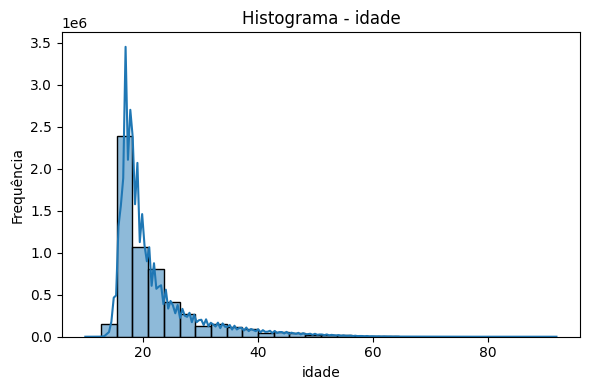

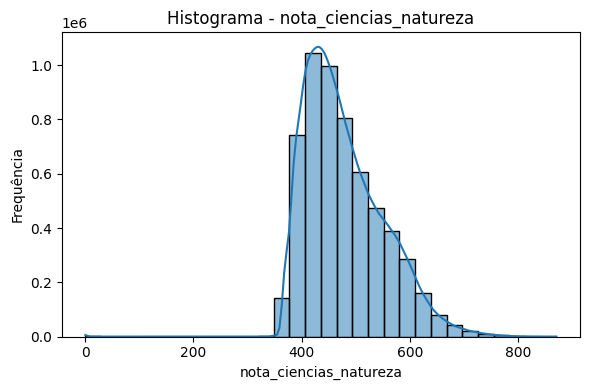

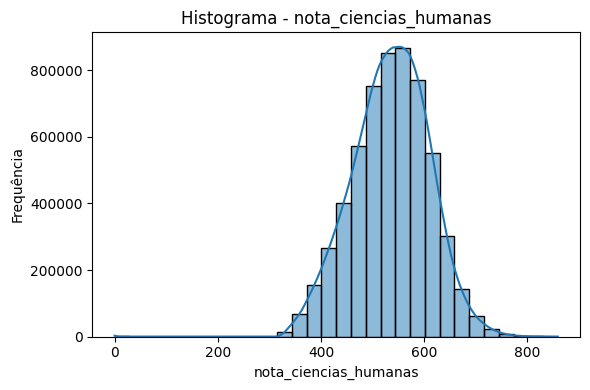

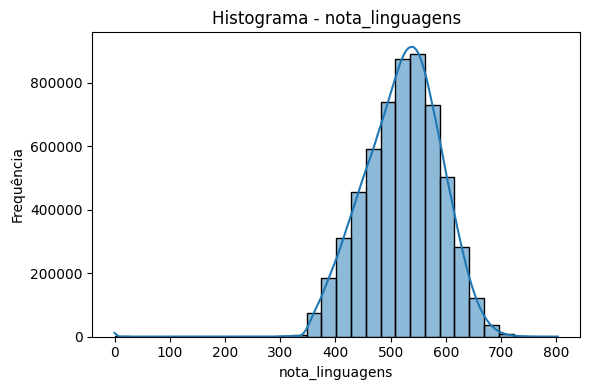

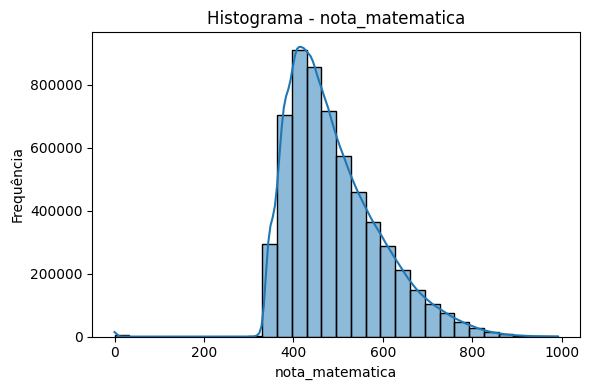

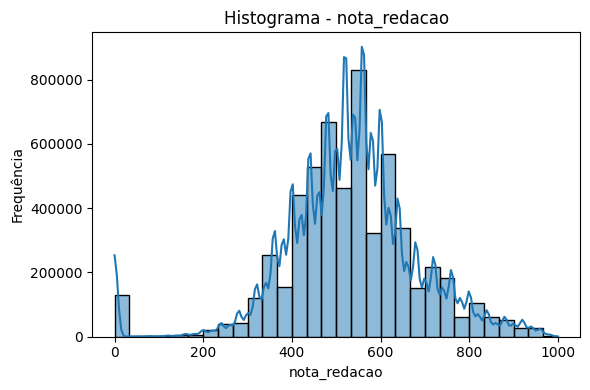

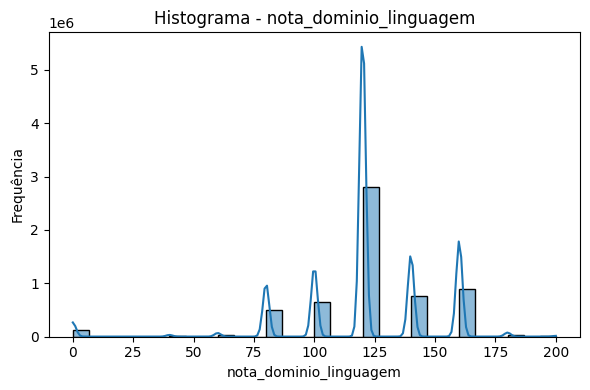

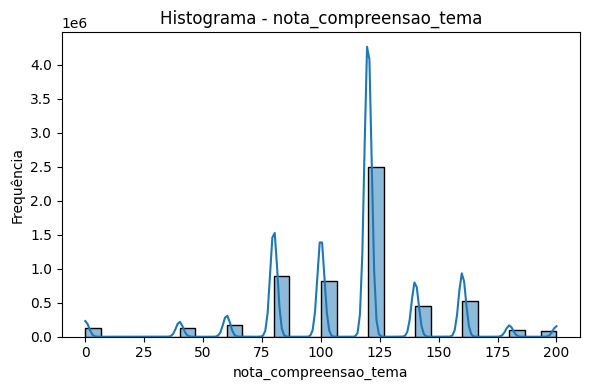

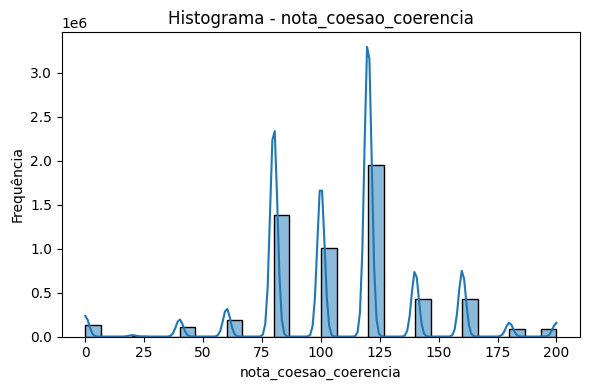

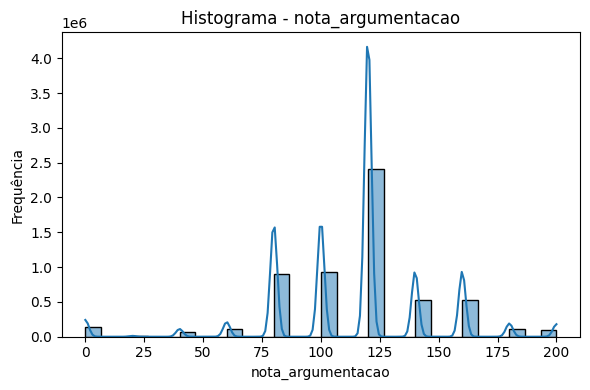

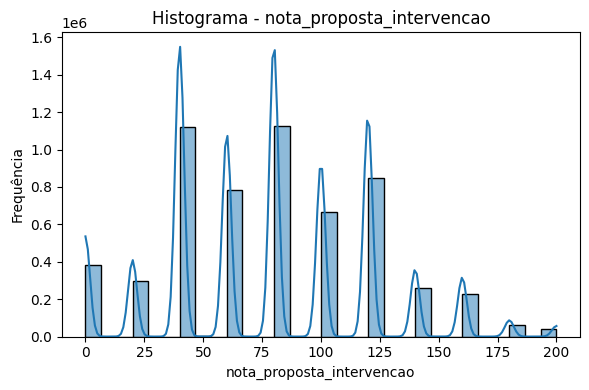

In [16]:
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Histograma - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


In [18]:
cat_cols = ["renda_familiar", "cor_raca", "tipo_escola", "uf_residencia", "sexo"]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        df[col].value_counts().sort_index().plot(kind="bar")
        plt.title(f"Distribuição - {col}")
        plt.xlabel(col)
        plt.ylabel("Contagem")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        display(df[col].value_counts(normalize=True).round(3))
